<a href="https://colab.research.google.com/github/rsshan5388/assignmentchirag/blob/main/Data_VissualizationAssignment1_Titanicdataset13012025.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Problem Statement: This assignment aims to perform data visualization on the Titanic dataset using Matplotlib and
#Seaborn libraries. By exploring the dataset visually, students are expected to gain insights into
#the characteristics of the data and derive meaningful interpretations.  R Sudarshan (used  Matplotlib and Seaborn)


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
#url = 'https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv'
url="/content/titanic.csv"
data = pd.read_csv(url)
data.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


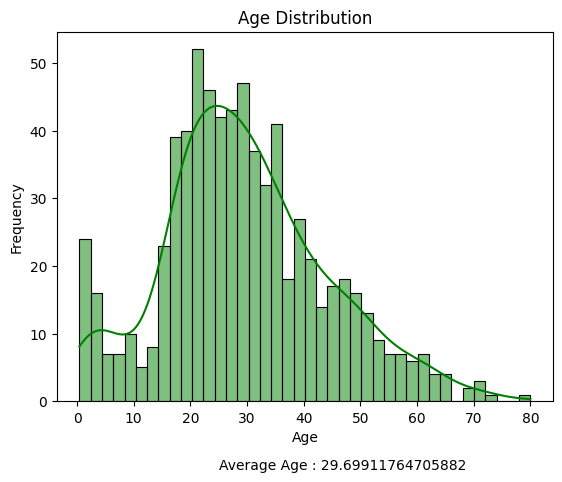

In [ ]:
sns.histplot(data['Age'], bins=40, kde=True, color='green')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
mean = data["Age"].mean()
plt.text(25,-10, f"Average Age : {mean}")
plt.show()



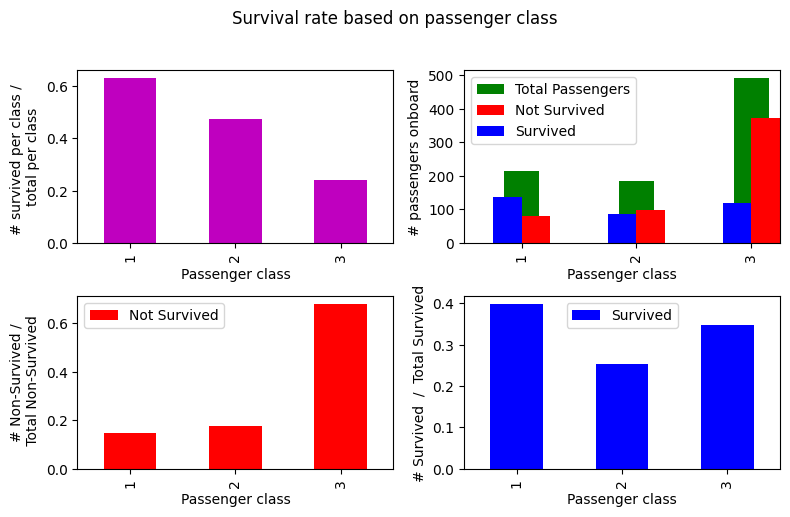

Pclass
1    216
2    184
3    491
Name: PassengerId, dtype: int64 
 Pclass
1    0.242424
2    0.206510
3    0.551066
Name: PassengerId, dtype: float64 
 Survived  Pclass
0         1          80
          2          97
          3         372
1         1         136
          2          87
          3         119
Name: Pclass, dtype: int64 
 Survived  Pclass
0         1          80
          2          97
          3         372
1         1         136
          2          87
          3         119
Name: Pclass, dtype: int64 
 Pclass
1    0.145719
2    0.176685
3    0.677596
Name: PassengerId, dtype: float64 
 Pclass
1    0.397661
2    0.254386
3    0.347953
Name: PassengerId, dtype: float64


In [ ]:
#2. How does the survival rate vary based on passenger class (Pclass)?
data_pclass = data.groupby(["Survived", "Pclass"])["Pclass"].count()
data_pclass_per = data.groupby(["Survived", "Pclass"])["Pclass"].count()
titanic_non_survived=data[data["Survived"]==0]

titanic_survived=data[data["Survived"]==1]
n=len(data)
plt.figure(figsize=(8,5))
plt.suptitle('Survival rate based on passenger class', x=0.5, y= 1.025, fontsize=12, weight=550)

plt.subplot(221)
(data_pclass[1]/(data_pclass[0]+data_pclass[1])).plot(kind="bar",\
                                        color="m",width=0.5)
plt.ylabel("# survived per class / \ntotal per class")
plt.xlabel("Passenger class")

plt.subplot(222)
data.groupby("Pclass").count()["PassengerId"].plot(kind="bar",\
                                        color="g",width=0.3, legend=True, label="Total Passengers")
data_pclass[0].plot(kind="bar", color="r", legend=True, position=0, width=0.25, label="Not Survived")
data_pclass[1].plot(kind="bar", color="b", legend=True, position=1, width=0.25, label="Survived")
plt.xlabel("Passenger class")
plt.ylabel("# passengers onboard")

plt.subplot(223)
(titanic_non_survived.groupby(["Pclass"])["PassengerId"].count()/len(titanic_non_survived))\
                .plot(kind="bar", color="r", legend=True, width=0.5, label="Not Survived")
plt.ylabel("# Non-Survived /\n Total Non-Survived")
plt.xlabel("Passenger class")

plt.subplot(224)
(titanic_survived.groupby(["Pclass"])["PassengerId"].count()/len(titanic_survived))\
                .plot(kind="bar", color="b", legend=True, width=0.5, label="Survived")
plt.ylabel("# Survived  /  Total Survived")
plt.xlabel("Passenger class")

plt.tight_layout()
plt.show()

print(data.groupby("Pclass").count()["PassengerId"],"\n",\
      data.groupby("Pclass").count()["PassengerId"]/n,"\n",\
      data_pclass,"\n",data_pclass_per,"\n", \
     (titanic_non_survived.groupby(["Pclass"])["PassengerId"].count()/len(titanic_non_survived)), "\n",\
     (titanic_survived.groupby(["Pclass"])["PassengerId"].count()/len(titanic_survived)))

<ipython-input-7-f848e51dd358>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x="Survived", y="Fare", palette="Set2")


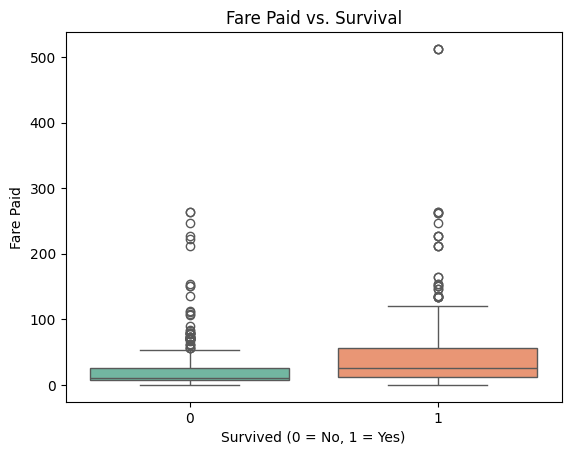

In [ ]:
#3. Is there a relationship between the fare paid and the likelihood of survival?
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(data=data, x="Survived", y="Fare", palette="Set2")

plt.title("Fare Paid vs. Survival")
plt.xlabel("Survived (0 = No, 1 = Yes)")
plt.ylabel("Fare Paid")
plt.show()

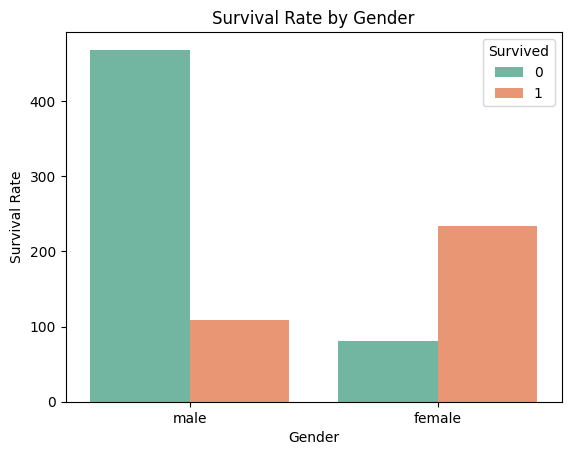

In [ ]:
#4. How does the survival rate differ between male and female passengers?
sns.countplot(x='Sex',  hue='Survived' ,data=data , palette='Set2')
plt.title('Survival Rate by Gender')
plt.xlabel('Gender')
plt.ylabel('Survival Rate')
plt.show()

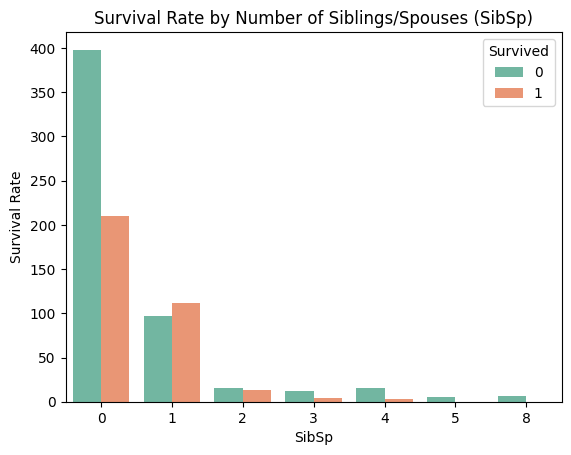

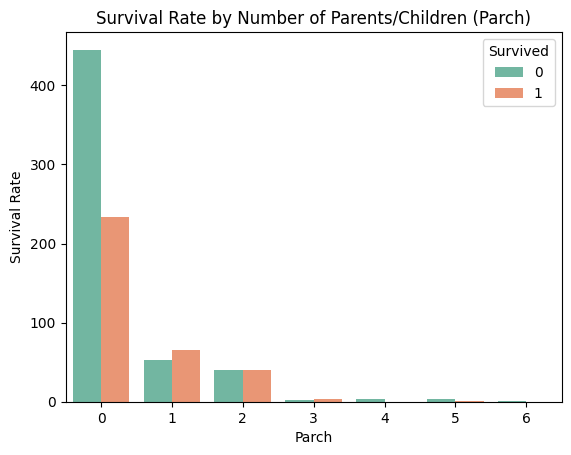

In [ ]:
#5 What impact does the number of siblings/spouses (SibSp) or parents/children (Parch) aboard have on survival?
sns.countplot(x='SibSp',  hue='Survived', data=data , palette='Set2')
plt.title('Survival Rate by Number of Siblings/Spouses (SibSp)')
plt.xlabel('SibSp')
plt.ylabel('Survival Rate')
plt.show()
sns.countplot(x='Parch',  hue='Survived', data=data , palette='Set2')
plt.title('Survival Rate by Number of Parents/Children (Parch)')
plt.xlabel('Parch')
plt.ylabel('Survival Rate')
plt.show()

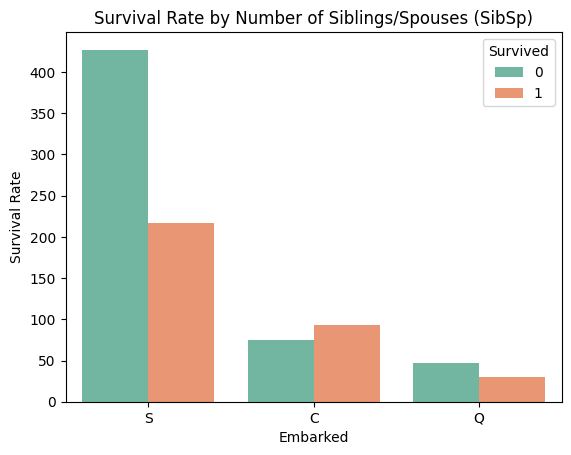

In [ ]:
#6 Are there any significant differences in survival rates among passengers embarked from different ports?
sns.countplot(x='Embarked',  hue='Survived', data=data , palette='Set2')
plt.title('Survival Rate by Number of Siblings/Spouses (SibSp)')
plt.xlabel('Embarked')
plt.ylabel('Survival Rate')
plt.show()